In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchsummary import summary

from IPython.display import Image as show_image
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import time
from PIL import Image

In [3]:
os.chdir('..')
os.chdir('..')

# A Brief Introduction to PyTorch

## What Exactly is PyTorch

PyTorch is a deep learning library. 

## What do all DL libraries have?

A python interface allowing us to effectively do the following on a GPU (without knowing CUDA or OpenCL)

- Tensor Computations
- Automatic Calculus Stuff
- Support for well used architecture components
- Framework for building more exotic model classes
- Utilties for dealing with data
- Utilities for serving models

## What makes PyTorch special?

First it's worth knowing that the only other library we can really compare/contest with is TensorFlow

- less boilerplate code
- Dynamic graphs
- feels more pythonic than pure tensorflow
- Facebook vs. Google (FBook seems to be better about open source)
- More popular among Academics

## Getting our feet wet with PyTorch

### What we have time for today 

- Working with Tensors
- Considering a simple optimization problem
- Using torch transforms to convert images to tensors
- Designing a simple convolutional network
- Performing a forward pass'
- Hacking problems with PyTorch

### What we won't have time for today (next week)

- Working with datasets
- Training a network
- Convnet best practices
- ...

In [4]:
one = torch.tensor(1)
two = torch.tensor(2)

In [7]:
one.dim()

0

In [8]:
three = one + two

In [10]:
three

tensor(3)

In [8]:
dir(three)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ilshift__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__se

In [11]:
np_three = np.int(1) + np.int(2)

In [12]:
dir(np_three)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [18]:
torch.tensor([[1,2,4,5],[1,2,4,6]]).dim()

2

In [19]:
torch.tensor([1,2]) + torch.tensor(1)

tensor([2, 3])

In [20]:
torch.tensor([1,2]) + torch.tensor([1])

tensor([2, 3])

In [21]:
torch.tensor([1,2]) + torch.tensor([1,2])

tensor([2, 4])

In [22]:
torch.tensor([1,2]) + torch.tensor([1,2,3])

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [ ]:
np.array([1,2]) + np.array([1])

In [ ]:
np.array([1,2]) + np.array([1,0])

In [16]:
np.array([1,2]) + np.array([1,0,1])

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [25]:
ones = (torch.ones((4, 4)))

In [26]:
ones.dim()

2

In [27]:
ones * 2

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

In [28]:
torch.matmul(torch.ones(1,4),torch.ones(4,1))

tensor([[4.]])

In [29]:
np.matmul(np.ones(4),np.ones(4).transpose())

4.0

In [30]:
np.ones([3,3,3])

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [31]:
torch.ones([3,3,3])

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [32]:
torch.matmul(torch.ones(3,3,3),torch.ones(3,3,3))

tensor([[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]])

In [33]:
np.matmul(np.ones([3,3,3]),np.ones([3,3,3]))

array([[[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]])

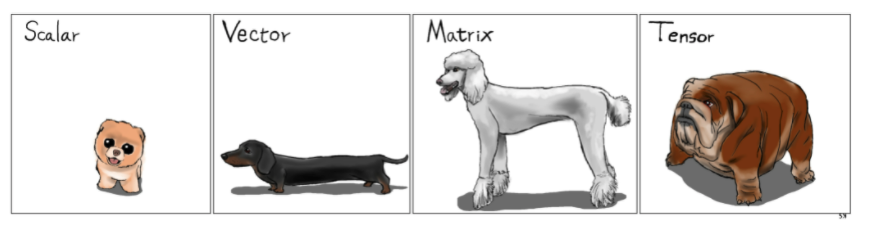

Credit to the author 

http://karlstratos.com/#drawings

## Unsubstantied Claim

Numpy NDarray and Tensors are functionally the same and only distinguishable by the following

- tensors are immutable
- tensors are backed by GPU

I'm not convinced that Tensors are really that important of a mathematical tool for ML vs. grasping at mathematical language for the sake of sounding like we know what we are talking about. This may be uncharitable, and maybe Tensor is a better descriptor than Ndarray or whatever but it definitely scares a lot of people off for no good reason.

In fact directly from the PyTorch docs:

"A PyTorch Tensor is basically the same as a numpy array: it does not know anything about deep learning or computational graphs or gradients, and is just a generic n-dimensional array to be used for arbitrary numeric computation."

See the following for proof that you should never believe what you read, people assumed that PyTorch Tensors were immutable like TensorFlow tensors are. They are not.

In [34]:
ones[0][0] = 2
ones

tensor([[2., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

## Doing Something More Useful

Approximating a function

In [23]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
start = time.time()
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
cpu_time = end-start
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(end-start)

99 102.60235464512114
199 71.64614499331586
299 50.93875900072011
399 37.07762808133763
499 27.79280650009527
599 21.5689023313464
699 17.39367934444952
799 14.5905900904655
899 12.707168059748714
999 11.440611095503352
1099 10.588137583500275
1199 10.013851058181835
1299 9.626611166599655
1399 9.365246393549643
1499 9.188666679437668
1599 9.069248044881528
1699 8.98840344111748
1799 8.933615243177886
1899 8.89644557745805
1999 8.871201255092029
Result: y = -0.005247745657669468 + 0.8514649696149739 x + 0.00090532344881265 x^2 + -0.09257994198379332 x^3
0.723994255065918


In [25]:
dtype = torch.float
#device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
start = time.time()
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
gpu_time = end-start
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')
print(end-start)

99 5359.09619140625
199 3546.95263671875
299 2348.5966796875
399 1556.127685546875
499 1032.0694580078125
599 685.5086669921875
699 456.32598876953125
799 304.765380859375
899 204.53634643554688
999 138.25296020507812
1099 94.41830444335938
1199 65.42920684814453
1299 46.25780487060547
1399 33.578956604003906
1499 25.193809509277344
1599 19.64828872680664
1699 15.98065185546875
1799 13.555078506469727
1899 11.950845718383789
1999 10.889822006225586
Result: y = -0.0029716212302446365 + 0.8125694394111633 x + 0.0005126516334712505 x^2 + -0.08704739809036255 x^3
0.9491355419158936


In [37]:
gpu_time,cpu_time

(0.31052088737487793, 0.7328319549560547)

So even in fitting a third order polynomial we find that torch and the GPU double the speed of the CPU. In practice the tasks we are doing are much more computationally difficult and embarassingly parallel. 

## Defining and Examining our First Model

In [40]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # remember we are feeding him a (120,120) image
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(12544, 120) 


    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        print(x.shape)
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        print(x.shape)
        x = F.relu(self.fc1(x))
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=12544, out_features=120, bias=True)
)


In [74]:
W = 120
K = 3
P = 0
S = 1

((W - K)/S + 1,  (W - K)/S + 1, 6)

(118.0, 118.0, 6)

In [119]:
((118*118)+1)*6

83550

In [75]:
118/2

59.0

In [76]:
W = 59
K = 3
P = 0
S = 1

((W - K)/S + 1,  (W - K)/S + 1, 16)

(57.0, 57.0, 16)

In [77]:
56/2

28.0

In [78]:
16*28*28

12544

In [32]:
!ls

n02099601_100.jpg   n02099601_281.jpg	n02099601_5132.jpg  n02099601_704.jpg
n02099601_1010.jpg  n02099601_286.jpg	n02099601_5160.jpg  n02099601_70.jpg
n02099601_1028.jpg  n02099601_2980.jpg	n02099601_5188.jpg  n02099601_7119.jpg
n02099601_109.jpg   n02099601_2994.jpg	n02099601_5240.jpg  n02099601_7123.jpg
n02099601_10.jpg    n02099601_3004.jpg	n02099601_5366.jpg  n02099601_7227.jpg
n02099601_1162.jpg  n02099601_3007.jpg	n02099601_544.jpg   n02099601_7304.jpg
n02099601_118.jpg   n02099601_304.jpg	n02099601_5452.jpg  n02099601_7312.jpg
n02099601_1249.jpg  n02099601_3073.jpg	n02099601_5453.jpg  n02099601_7387.jpg
n02099601_124.jpg   n02099601_308.jpg	n02099601_5544.jpg  n02099601_7432.jpg
n02099601_1259.jpg  n02099601_3097.jpg	n02099601_5642.jpg  n02099601_7437.jpg
n02099601_1324.jpg  n02099601_3111.jpg	n02099601_5655.jpg  n02099601_7588.jpg
n02099601_142.jpg   n02099601_3202.jpg	n02099601_5679.jpg  n02099601_7654.jpg
n02099601_1442.jpg  n02099601_3262.jpg	n02099601_569.jpg   n02099601_77

In [33]:
#os.chdir('dogs/Images/n02099601-golden_retriever')
goldens = [f for f in os.listdir('.') if os.path.isfile(f)]

In [34]:
image = Image.open(goldens[2])

transform = transforms.Compose([transforms.Resize((120,120)),transforms.Grayscale(),transforms.ToTensor()])

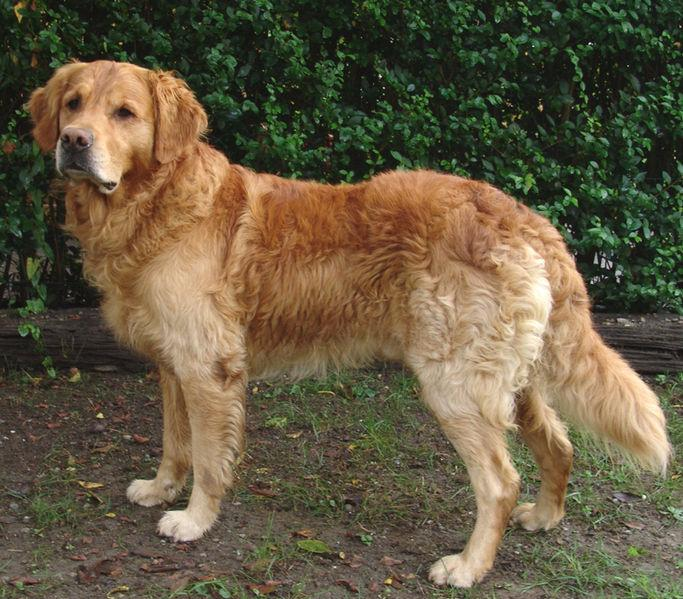

In [35]:
show_image(goldens[2])

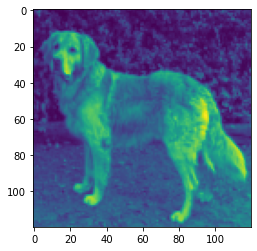

In [36]:
tensor = transform(image)
tensor_image = tensor.view(tensor.shape[1], tensor.shape[2], tensor.shape[0])
plt.imshow(tensor_image)
plt.show()

In [38]:
tensor.dim()

3

In [42]:
tensor = tensor.unsqueeze(0)

In [43]:
tensor.shape

torch.Size([1, 1, 120, 120])

In [46]:
net(tensor).size()

torch.Size([1, 6, 59, 59])
torch.Size([1, 16, 28, 28])
torch.Size([1, 12544])


torch.Size([1, 120])

In [118]:
net.conv1.weight

Parameter containing:
tensor([[[[ 0.2969,  0.2922,  0.1270],
          [ 0.1848,  0.0061,  0.0197],
          [ 0.2033,  0.2719, -0.2865]]],


        [[[-0.0074,  0.1695, -0.1723],
          [ 0.3289,  0.3093, -0.1213],
          [-0.2235, -0.2592,  0.0536]]],


        [[[ 0.2894,  0.0475,  0.3278],
          [-0.0970, -0.2081,  0.0674],
          [ 0.2524, -0.3023,  0.2643]]],


        [[[-0.1697,  0.1535, -0.1563],
          [-0.0959, -0.1353, -0.0688],
          [ 0.2196, -0.2489,  0.1507]]],


        [[[ 0.2356,  0.2158, -0.1211],
          [-0.2985, -0.0248,  0.1404],
          [-0.2181,  0.3287, -0.0234]]],


        [[[-0.2745, -0.1943, -0.1152],
          [-0.0725, -0.0208, -0.2770],
          [ 0.0294, -0.2691,  0.2701]]]], requires_grad=True)

In [47]:
conv_output = net.conv1(tensor)

In [48]:
conv_output[0][0].shape

torch.Size([118, 118])

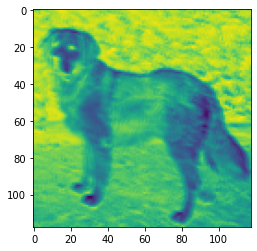

In [54]:
plt.imshow(conv_output[0][5].detach().numpy())
plt.show()